# HFRD data generation method

This method is an hybrid Flamelet / random data approach to generate training data for neural networks. The idea is to compute standard flamelets (0D, 1D premixed, 1D diffusion) and augment them using a random based technique.

Using Google Colab:

In [1]:
use_colab = False

## Google colab preparation

These lines are here to enable Colab running of the tools. We need to perform a git clone in order to have access to python scripts. This needs to be done at each runtime as the clone is lost. 

In [2]:
import os

if use_colab:
    !git clone -b cost_course_exercices https://github.com/cmehl/ML_chem.git
    !pip install PyDOE
    !pip install cantera

    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Create a folder in the root directory
    if not os.path.isdir("/content/drive/MyDrive/ML_chem_data"):
        !mkdir -p "/content/drive/MyDrive/ML_chem_data"
    else:
        print("Folder /content/drive/MyDrive/ML_chem_data already exists")

## Imports

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import joblib
import json
import pickle

import numpy as np

import matplotlib.pyplot as plt

if use_colab:
    from ML_chem.database_flamelets import DatabaseFlamelets
    from ML_chem.chem_ai.utils import StandardScaler
else:
    from chem_ai.database_flamelets import DatabaseFlamelets
    from chem_ai.utils import StandardScaler

# Flames computation

We first define common parameters to all flames computations, such as fuel, chemical mechanism, etc...

In [5]:
p = 101325.0

fuel = "H2"
mech_file = "/work/mehlc/Lecture_IA_chem_accel/chem_AI_project/data/mechanisms/mech_h2.yaml"

folder = "case_multi_" + "test_case_flamelets"

dt_CFD = 1.0e-6

In [7]:
dtb = DatabaseFlamelets(mech_file, fuel, folder, p, dt_CFD)

## 0D reactors

In [8]:
phi_bounds = (0.8, 1.0)
T0_bounds = (1500.0, 1600.0)

n_samples = 100

max_sim_time = 10.0e-3

solve_mode = "dt_cfd"

T0=1523.911186226366; phi=0.994399312364999
T0=1591.012909412451; phi=0.9898862492298846
T0=1573.0876015348158; phi=0.8918936077032537
T0=1526.5098092734504; phi=0.803463234319374
T0=1509.9041348610058; phi=0.970418668186428
T0=1553.3415579868704; phi=0.8297946062722598
T0=1582.6564827840803; phi=0.9693616854920307
T0=1547.21325861767; phi=0.9267703467592674
T0=1544.1549338630873; phi=0.9458424296326413
T0=1585.7636035415387; phi=0.8209641731545124
T0=1579.0778738684076; phi=0.8601861835617542
T0=1572.1035993886098; phi=0.9327541635343349
T0=1584.6698504099706; phi=0.868598548404897
T0=1514.3984957769749; phi=0.897935772985782
T0=1577.9250923598377; phi=0.9389384094111617
T0=1580.306548980011; phi=0.8073523208198532
T0=1588.293981180555; phi=0.9473449053746923
T0=1524.3790478585051; phi=0.9340932132560478
T0=1520.8208322916435; phi=0.8389157396910983
T0=1555.5920418645455; phi=0.8487126259503727
T0=1522.1485922865386; phi=0.9082108656284599
T0=1554.7720277147648; phi=0.9112727053097897

/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:167: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, df_ODE_0D], axis=0).reset_index(drop=True)


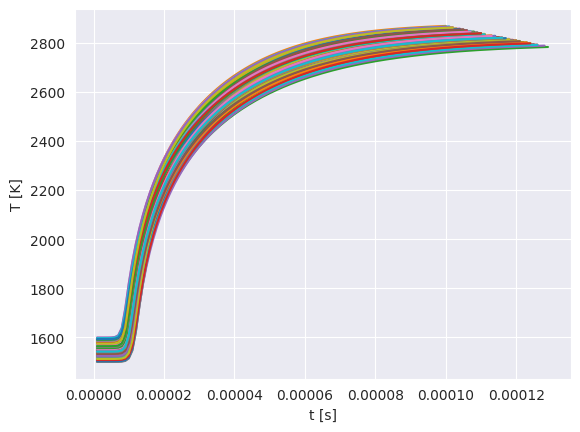

In [9]:
dtb.compute_0d_reactors(phi_bounds, T0_bounds, n_samples, max_sim_time, solve_mode)

## 1D PREMIXED FLAMES

In [10]:
phi_bounds = (0.5, 1.0)
T0_bounds = (300.0, 500.0)

n_samples = 100

T0=420.3460996924117; phi=0.7805487066242985
T0=403.36356649606665; phi=0.7701275054460839
T0=492.64212144722376; phi=0.9247789829870059
T0=484.8670081812512; phi=0.6928348714858701
T0=307.2592477806191; phi=0.6038571804917096
T0=490.7052828700137; phi=0.5318454069116483
T0=496.536047868372; phi=0.7661306820864423
T0=413.9374543786602; phi=0.5465638406109089
T0=316.27875304570046; phi=0.9671586495804556
T0=406.73685285748866; phi=0.5734398939635864
T0=342.2430220575553; phi=0.9282725402118893
T0=441.86770865369704; phi=0.6151299748988143
T0=308.54131725756207; phi=0.850541635031421
T0=354.766220129685; phi=0.8882414155745793
T0=319.5134996893601; phi=0.8186283242018397
T0=380.8562216962339; phi=0.7340802183661401
T0=397.48985877395296; phi=0.666589728701177
T0=465.139885706497; phi=0.5279206995303924
T0=458.3756914328991; phi=0.8320771222471359
T0=487.54483933074306; phi=0.6127578233029454
T0=498.3704114336483; phi=0.755836833507231
T0=453.68995513153106; phi=0.7292287626905147
T0=472.

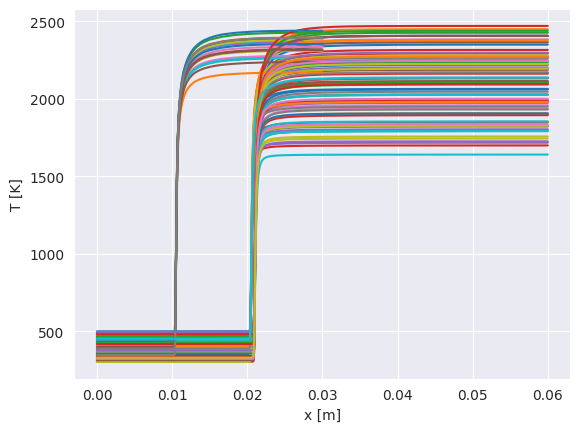

In [11]:
dtb.compute_1d_premixed(phi_bounds, T0_bounds, n_samples)

## 1D DIFFUSION FLAMES

In [12]:
strain_bounds = (0., 1000.0)
T0_bounds = (300.0, 500.0)

n_samples = 100

width = 0.02

T0_ox=396.94526844246195; strain=263.37224291045527
T0_ox=360.17597314515274; strain=249.4049345193398
T0_ox=439.2519090902081; strain=998.6588039798929
T0_ox=331.40263137117216; strain=629.9955983146154
T0_ox=481.3893318719389; strain=69.40891151162631
T0_ox=492.23292221666674; strain=177.8761860220931
T0_ox=301.2264674713911; strain=334.6213861391488
T0_ox=363.99288270940707; strain=737.4335650358265
T0_ox=494.2328498501147; strain=912.3486712385071
T0_ox=319.03562170904553; strain=826.2991630836797
T0_ox=311.83711769564206; strain=753.0204169306495
T0_ox=346.10391075467; strain=168.93962389685598
T0_ox=484.0975767950597; strain=775.4452724051837
T0_ox=417.8502291156004; strain=418.59959332138595
T0_ox=316.0169339266703; strain=813.386346619798
T0_ox=389.64630391729384; strain=924.3112789089917
T0_ox=391.580607395655; strain=801.4610362406979
T0_ox=441.365326843909; strain=762.3221455955132
T0_ox=314.9669445939986; strain=636.8519558647371
T0_ox=444.2659740076219; strain=935.80672812

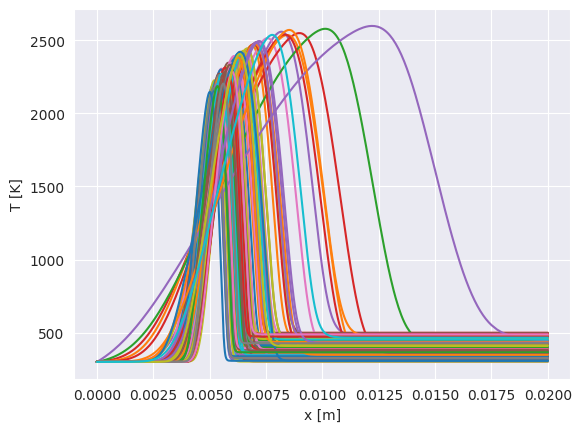

In [13]:
dtb.compute_1d_diffusion(strain_bounds, T0_bounds, n_samples, width)

## Postprocessing simulations database

<Axes: xlabel='Temperature', ylabel='OH'>

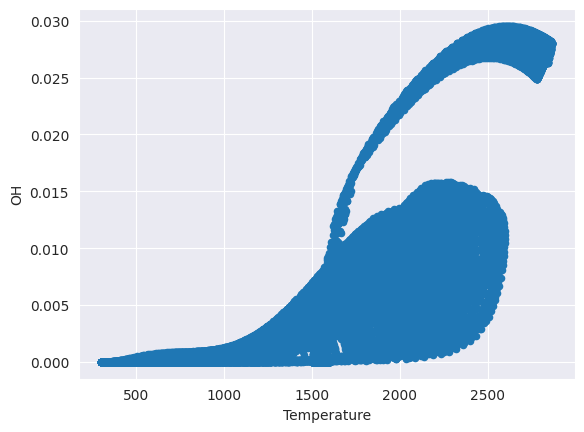

In [14]:
dtb.df.plot.scatter(x="Temperature", y="OH")

In [15]:
dtb.augment_data()

/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/data

>> T computation crashed for row 28305
>> T computation crashed for row 28522


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/data

>> T computation crashed for row 30490


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/data

>> T computation crashed for row 33951
>> T computation crashed for row 33954
>> T computation crashed for row 33955
>> T computation crashed for row 33955
>> T computation crashed for row 34144


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/data

>> T computation crashed for row 42139
>> T computation crashed for row 42143


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:481: RuntimeWarning: divide by zero encountered in scalar divide
  O_N_ratio = X_el[2]/X_el[3]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/data

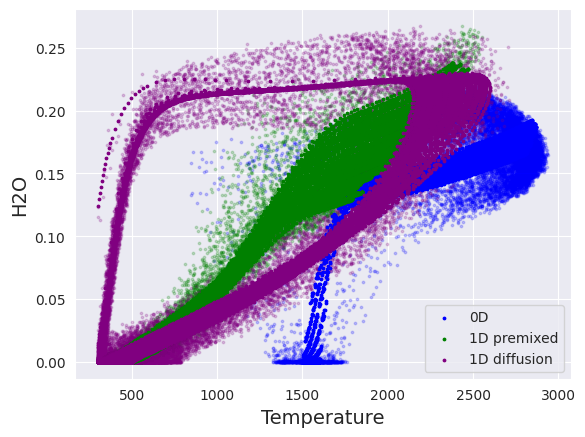

In [16]:
fig, ax = plt.subplots()

x_var = "Temperature"
y_var = "H2O"

ax.scatter(dtb.df_augmented[x_var][dtb.df_augmented["reactor_type"]==0], dtb.df_augmented[y_var][dtb.df_augmented["reactor_type"]==0], color="blue", alpha=0.2,  s=3)
ax.scatter(dtb.df_augmented[x_var][dtb.df_augmented["reactor_type"]==1], dtb.df_augmented[y_var][dtb.df_augmented["reactor_type"]==1], color="green", alpha=0.2,  s=3)
ax.scatter(dtb.df_augmented[x_var][dtb.df_augmented["reactor_type"]==2], dtb.df_augmented[y_var][dtb.df_augmented["reactor_type"]==2], color="purple", alpha=0.2,  s=3)

ax.scatter(dtb.df_flamelet[x_var][dtb.df_flamelet["reactor_type"]==0], dtb.df_flamelet[y_var][dtb.df_flamelet["reactor_type"]==0], color="blue", s=3, label="0D")
ax.scatter(dtb.df_flamelet[x_var][dtb.df_flamelet["reactor_type"]==1], dtb.df_flamelet[y_var][dtb.df_flamelet["reactor_type"]==1], color="green", s=3, label="1D premixed")
ax.scatter(dtb.df_flamelet[x_var][dtb.df_flamelet["reactor_type"]==2], dtb.df_flamelet[y_var][dtb.df_flamelet["reactor_type"]==2], color="purple", s=3, label="1D diffusion")

ax.set_xlabel(x_var, fontsize=14)
ax.set_ylabel(y_var, fontsize=14)

ax.legend()

In [17]:
dtb.save_database()

# Generation of train and test databases

>> 0D reactors: Building X, Y for simulation 99
>> 0D reactors: Building X, Y for simulation 46
>> 0D reactors: Building X, Y for simulation 7


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 8
>> 0D reactors: Building X, Y for simulation 15
>> 0D reactors: Building X, Y for simulation 97


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 81
>> 0D reactors: Building X, Y for simulation 32
>> 0D reactors: Building X, Y for simulation 0


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 85
>> 0D reactors: Building X, Y for simulation 70
>> 0D reactors: Building X, Y for simulation 11
>> 0D reactors: Building X, Y for simulation 65


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 51
>> 0D reactors: Building X, Y for simulation 44
>> 0D reactors: Building X, Y for simulation 89


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 87
>> 0D reactors: Building X, Y for simulation 17
>> 0D reactors: Building X, Y for simulation 25


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 5
>> 0D reactors: Building X, Y for simulation 47
>> 0D reactors: Building X, Y for simulation 42


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 96
>> 0D reactors: Building X, Y for simulation 63
>> 0D reactors: Building X, Y for simulation 78


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 68
>> 0D reactors: Building X, Y for simulation 20
>> 0D reactors: Building X, Y for simulation 19


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 6
>> 0D reactors: Building X, Y for simulation 80
>> 0D reactors: Building X, Y for simulation 12


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 41
>> 0D reactors: Building X, Y for simulation 49
>> 0D reactors: Building X, Y for simulation 72


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 39
>> 0D reactors: Building X, Y for simulation 3


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 56
>> 0D reactors: Building X, Y for simulation 95
>> 0D reactors: Building X, Y for simulation 79


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 33
>> 0D reactors: Building X, Y for simulation 93
>> 0D reactors: Building X, Y for simulation 54


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 45
>> 0D reactors: Building X, Y for simulation 64
>> 0D reactors: Building X, Y for simulation 38


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 9
>> 0D reactors: Building X, Y for simulation 91
>> 0D reactors: Building X, Y for simulation 1


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 23
>> 0D reactors: Building X, Y for simulation 77
>> 0D reactors: Building X, Y for simulation 83


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 22
>> 0D reactors: Building X, Y for simulation 36
>> 0D reactors: Building X, Y for simulation 35


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 60
>> 0D reactors: Building X, Y for simulation 2
>> 0D reactors: Building X, Y for simulation 73
>> 0D reactors: Building X, Y for simulation 94


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 43
>> 0D reactors: Building X, Y for simulation 52


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 90
>> 0D reactors: Building X, Y for simulation 92
>> 0D reactors: Building X, Y for simulation 10


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 59
>> 0D reactors: Building X, Y for simulation 62
>> 0D reactors: Building X, Y for simulation 4
>> 0D reactors: Building X, Y for simulation 28


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 61
>> 0D reactors: Building X, Y for simulation 57
>> 0D reactors: Building X, Y for simulation 24


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 30
>> 0D reactors: Building X, Y for simulation 82
>> 1D premixed flames: Building X, Y for simulation 99
>> 1D premixed flames: Building X, Y for simulation 46


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 7
>> 1D premixed flames: Building X, Y for simulation 8
>> 1D premixed flames: Building X, Y for simulation 15


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 97
>> 1D premixed flames: Building X, Y for simulation 81
>> 1D premixed flames: Building X, Y for simulation 32
>> 1D premixed flames: Building X, Y for simulation 0


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 85
>> 1D premixed flames: Building X, Y for simulation 70
>> 1D premixed flames: Building X, Y for simulation 11
>> 1D premixed flames: Building X, Y for simulation 65


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 51
>> 1D premixed flames: Building X, Y for simulation 44
>> 1D premixed flames: Building X, Y for simulation 89


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 87
>> 1D premixed flames: Building X, Y for simulation 17
>> 1D premixed flames: Building X, Y for simulation 25


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 5
>> 1D premixed flames: Building X, Y for simulation 47
>> 1D premixed flames: Building X, Y for simulation 42
>> 1D premixed flames: Building X, Y for simulation 96


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 63
>> 1D premixed flames: Building X, Y for simulation 78
>> 1D premixed flames: Building X, Y for simulation 68
>> 1D premixed flames: Building X, Y for simulation 20


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 19
>> 1D premixed flames: Building X, Y for simulation 6
>> 1D premixed flames: Building X, Y for simulation 80
>> 1D premixed flames: Building X, Y for simulation 12


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 41
>> 1D premixed flames: Building X, Y for simulation 49
>> 1D premixed flames: Building X, Y for simulation 72
>> 1D premixed flames: Building X, Y for simulation 39


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 3
>> 1D premixed flames: Building X, Y for simulation 56
>> 1D premixed flames: Building X, Y for simulation 95


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 79
>> 1D premixed flames: Building X, Y for simulation 33
>> 1D premixed flames: Building X, Y for simulation 93


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 54
>> 1D premixed flames: Building X, Y for simulation 45
>> 1D premixed flames: Building X, Y for simulation 64


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 38
>> 1D premixed flames: Building X, Y for simulation 9
>> 1D premixed flames: Building X, Y for simulation 91
>> 1D premixed flames: Building X, Y for simulation 1


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 23
>> 1D premixed flames: Building X, Y for simulation 77
>> 1D premixed flames: Building X, Y for simulation 83


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 22
>> 1D premixed flames: Building X, Y for simulation 36
>> 1D premixed flames: Building X, Y for simulation 35
>> 1D premixed flames: Building X, Y for simulation 60


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 2
>> 1D premixed flames: Building X, Y for simulation 73
>> 1D premixed flames: Building X, Y for simulation 94


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 43
>> 1D premixed flames: Building X, Y for simulation 52
>> 1D premixed flames: Building X, Y for simulation 90


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 92
>> 1D premixed flames: Building X, Y for simulation 10
>> 1D premixed flames: Building X, Y for simulation 59
>> 1D premixed flames: Building X, Y for simulation 62


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 4
>> 1D premixed flames: Building X, Y for simulation 28
>> 1D premixed flames: Building X, Y for simulation 61
>> 1D premixed flames: Building X, Y for simulation 57


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 24
>> 1D premixed flames: Building X, Y for simulation 30
>> 1D premixed flames: Building X, Y for simulation 82
>> 1D diffusion flames: Building X, Y for simulation 99


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 46
>> 1D diffusion flames: Building X, Y for simulation 7
>> 1D diffusion flames: Building X, Y for simulation 8


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 15
>> 1D diffusion flames: Building X, Y for simulation 97
>> 1D diffusion flames: Building X, Y for simulation 81


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 32
>> 1D diffusion flames: Building X, Y for simulation 0
>> 1D diffusion flames: Building X, Y for simulation 85
>> 1D diffusion flames: Building X, Y for simulation 70


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 11
>> 1D diffusion flames: Building X, Y for simulation 65
>> 1D diffusion flames: Building X, Y for simulation 51
>> 1D diffusion flames: Building X, Y for simulation 44


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is

>> 1D diffusion flames: Building X, Y for simulation 89
>> 1D diffusion flames: Building X, Y for simulation 87
>> 1D diffusion flames: Building X, Y for simulation 17


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 25
>> 1D diffusion flames: Building X, Y for simulation 5
>> 1D diffusion flames: Building X, Y for simulation 47
>> 1D diffusion flames: Building X, Y for simulation 42


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 96
>> 1D diffusion flames: Building X, Y for simulation 63
>> 1D diffusion flames: Building X, Y for simulation 78


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 68
>> 1D diffusion flames: Building X, Y for simulation 20
>> 1D diffusion flames: Building X, Y for simulation 19


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 6
>> 1D diffusion flames: Building X, Y for simulation 80


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 12
>> 1D diffusion flames: Building X, Y for simulation 41
>> 1D diffusion flames: Building X, Y for simulation 49
>> 1D diffusion flames: Building X, Y for simulation 72


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 39
>> 1D diffusion flames: Building X, Y for simulation 3
>> 1D diffusion flames: Building X, Y for simulation 56


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 95
>> 1D diffusion flames: Building X, Y for simulation 79
>> 1D diffusion flames: Building X, Y for simulation 33


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 93
>> 1D diffusion flames: Building X, Y for simulation 54
>> 1D diffusion flames: Building X, Y for simulation 45


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 64
>> 1D diffusion flames: Building X, Y for simulation 38


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 9
>> 1D diffusion flames: Building X, Y for simulation 91
>> 1D diffusion flames: Building X, Y for simulation 1


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 23
>> 1D diffusion flames: Building X, Y for simulation 77
>> 1D diffusion flames: Building X, Y for simulation 83


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 22
>> 1D diffusion flames: Building X, Y for simulation 36
>> 1D diffusion flames: Building X, Y for simulation 35


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 60
>> 1D diffusion flames: Building X, Y for simulation 2
>> 1D diffusion flames: Building X, Y for simulation 73


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 94
>> 1D diffusion flames: Building X, Y for simulation 43
>> 1D diffusion flames: Building X, Y for simulation 52


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 90
>> 1D diffusion flames: Building X, Y for simulation 92
>> 1D diffusion flames: Building X, Y for simulation 10


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 59
>> 1D diffusion flames: Building X, Y for simulation 62


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 4
>> 1D diffusion flames: Building X, Y for simulation 28
>> 1D diffusion flames: Building X, Y for simulation 61


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 57
>> 1D diffusion flames: Building X, Y for simulation 24
>> 1D diffusion flames: Building X, Y for simulation 30


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 82
>> 0D reactors: Building X, Y for simulation 26
>> 0D reactors: Building X, Y for simulation 31


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 37
>> 0D reactors: Building X, Y for simulation 86
>> 0D reactors: Building X, Y for simulation 76


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 14
>> 0D reactors: Building X, Y for simulation 88


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 48
>> 0D reactors: Building X, Y for simulation 71
>> 0D reactors: Building X, Y for simulation 67


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 13
>> 0D reactors: Building X, Y for simulation 84
>> 0D reactors: Building X, Y for simulation 58
>> 0D reactors: Building X, Y for simulation 40


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 0][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:615: UserWarning: Boolean Series key will be reindexed to match Data

>> 0D reactors: Building X, Y for simulation 75
>> 1D premixed flames: Building X, Y for simulation 26
>> 1D premixed flames: Building X, Y for simulation 31


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 37
>> 1D premixed flames: Building X, Y for simulation 86
>> 1D premixed flames: Building X, Y for simulation 76


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 14
>> 1D premixed flames: Building X, Y for simulation 88
>> 1D premixed flames: Building X, Y for simulation 48


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 71
>> 1D premixed flames: Building X, Y for simulation 67
>> 1D premixed flames: Building X, Y for simulation 13
>> 1D premixed flames: Building X, Y for simulation 84


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D premixed flames: Building X, Y for simulation 58
>> 1D premixed flames: Building X, Y for simulation 40
>> 1D premixed flames: Building X, Y for simulation 75


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 1][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:640: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 26
>> 1D diffusion flames: Building X, Y for simulation 31
>> 1D diffusion flames: Building X, Y for simulation 37


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 86
>> 1D diffusion flames: Building X, Y for simulation 76
>> 1D diffusion flames: Building X, Y for simulation 14


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 88
>> 1D diffusion flames: Building X, Y for simulation 48
>> 1D diffusion flames: Building X, Y for simulation 71


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 67
>> 1D diffusion flames: Building X, Y for simulation 13
>> 1D diffusion flames: Building X, Y for simulation 84


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match Data

>> 1D diffusion flames: Building X, Y for simulation 58
>> 1D diffusion flames: Building X, Y for simulation 40
>> 1D diffusion flames: Building X, Y for simulation 75


/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:664: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_i = self.df[self.df['reactor_type'] == 2][self.df['Simulation number'] == i].iloc[:, :-2]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:707: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = row[0]
/work/mehlc/2_IA_KINETICS/ML_chem/chem_ai/database_flamelets.py:708: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = row[1]


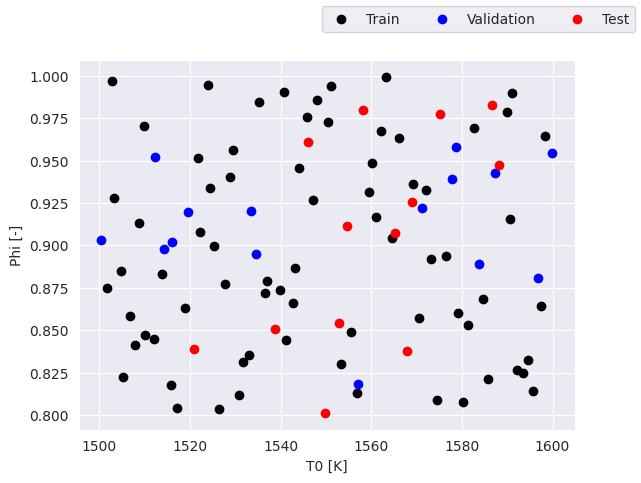

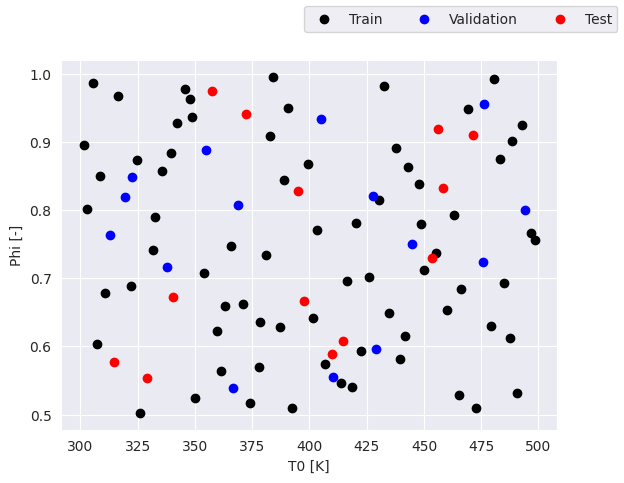

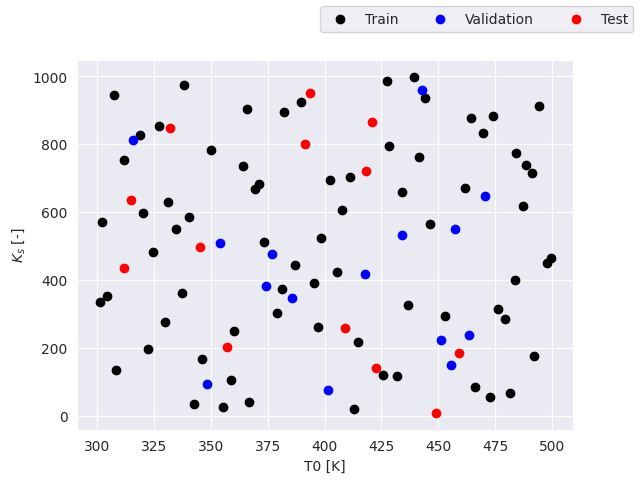

In [18]:
valid_ratio = 0.15
test_ratio = 0.15
dtb.generate_train_valid_test(valid_ratio, test_ratio)

In [19]:
dtb.X_train.head()

,Temperature_X,H_X,H2_X,O_X,O2_X,OH_X,H2O_X,N2_X,HO2_X,H2O2_X
0,596.584736,9.574755e-07,0.000130,0.000062,0.254954,0.000112,0.021364,0.723241,0.000111,2.617885e-05
1,2807.176344,8.012148e-04,0.002955,0.008008,0.040807,0.027199,0.171921,0.748294,0.000015,9.087968e-07
2,470.763732,5.582032e-06,0.017611,0.000004,0.225506,0.000105,0.004445,0.751880,0.000391,5.124819e-05
3,1901.585092,3.384634e-07,0.000008,0.000057,0.097763,0.001075,0.146972,0.754122,0.000002,1.087778e-07
4,2695.114287,8.155788e-04,0.002629,0.009013,0.049133,0.026410,0.162799,0.749184,0.000015,1.228113e-06


In [20]:
dtb.Y_train.head()

,H_Y,H2_Y,O_Y,O2_Y,OH_Y,H2O_Y,N2_Y,HO2_Y,H2O2_Y
0,5.043795e-07,0.000130,0.000057,0.254966,0.000105,0.021375,0.723241,0.000100,2.648248e-05
1,7.992883e-04,0.002950,0.007984,0.040810,0.027132,0.172016,0.748294,0.000015,9.150964e-07
2,2.365298e-06,0.017608,0.000004,0.225469,0.000084,0.004515,0.751880,0.000383,5.383027e-05
3,3.384201e-07,0.000008,0.000057,0.097763,0.001075,0.146972,0.754122,0.000002,1.087692e-07
4,8.062883e-04,0.002616,0.008940,0.049043,0.026377,0.163018,0.749184,0.000015,1.211158e-06


# Pre-processing of database

We set a flag to decide if we apply the logarithm or not:

In [32]:
log_transform = False
threshold = 1.0e-10

## Option 1: full database

We devine new arrays which will contain the processed database:

In [ ]:
X_train_p = dtb.X_train.copy()
Y_train_p = dtb.Y_train.copy()
X_val_p = dtb.X_val.copy()
Y_val_p = dtb.Y_val.copy()

Applying logarithm transformation:

In [24]:
if log_transform:
    X_train_p[X_train_p < threshold] = threshold
    X_val_p[X_val_p < threshold] = threshold
    #
    Y_train_p[Y_train_p < threshold] = threshold
    Y_val_p[Y_val_p < threshold] = threshold

    # Apply log
    X_train_p.iloc[:, 1:] = np.log(X_train_p.iloc[:, 1:])
    X_val_p.iloc[:, 1:] = np.log(X_val_p.iloc[:, 1:])
    #
    Y_train_p = np.log(Y_train_p)
    Y_val_p = np.log(Y_val_p)

We apply then the standard Scaler:

In [25]:
Xscaler = StandardScaler()
Xscaler.fit(X_train_p)
X_train_p = Xscaler.transform(X_train_p)
X_val_p = Xscaler.transform(X_val_p)

Yscaler = StandardScaler()
Yscaler.fit(Y_train_p)
Y_train_p = Yscaler.transform(Y_train_p)
Y_val_p = Yscaler.transform(Y_val_p)

We can have a look to check the database:

In [26]:
X_train_p.head()

,Temperature_X,H_X,H2_X,O_X,O2_X,OH_X,H2O_X,N2_X,HO2_X,H2O2_X
0,-0.105077,-0.588953,-0.383624,-0.566503,1.209274,-0.653380,-0.722459,0.303882,0.922586,1.194395
1,1.048976,1.771439,-0.368727,2.400804,-0.631964,1.654619,0.641758,0.345754,-0.334410,-0.234609
2,-1.025977,-0.635035,-0.328319,-0.659035,0.930148,-0.724430,-1.196539,0.542680,-0.123285,-0.359263
3,-0.963542,-0.635179,-0.384431,-0.658998,1.007791,-0.724535,-1.187804,0.578579,-0.442720,-0.365468
4,-1.052052,-0.634147,-0.309354,-0.658687,1.533520,-0.722694,-1.135615,0.232247,2.539663,2.795078


In [27]:
Y_train_p.head()

,H_Y,H2_Y,O_Y,O2_Y,OH_Y,H2O_Y,N2_Y,HO2_Y,H2O2_Y
0,-0.603723,-0.383102,-0.528388,1.217049,-0.645244,-0.730856,0.303882,0.369146,0.840860
1,1.648842,-0.368303,2.301858,-0.628821,1.750398,0.634022,0.345754,-0.363240,-0.215457
2,-0.631964,-0.327774,-0.662779,0.942358,-0.740968,-1.203392,0.542680,-0.035562,-0.337040
3,-0.632061,-0.383876,-0.662743,1.020155,-0.741035,-1.194723,0.578579,-0.515568,-0.344691
4,-0.631589,-0.308815,-0.662509,1.546729,-0.739618,-1.142694,0.232247,3.711196,3.105222


In [37]:
print(f" >> {X_train_p.shape[0]} points in training set")
print(f" >> {X_val_p.shape[0]} points in validation set \n")

 >> 65684 points in training set
 >> 13784 points in validation set 



We save the scalers:

In [29]:
folder_p = os.path.join(folder,"processed_database")
if not os.path.isdir(folder_p):
    os.mkdir(folder_p)

joblib.dump(Xscaler, os.path.join(folder_p,'Xscaler.pkl'))
joblib.dump(Yscaler, os.path.join(folder_p,'Yscaler.pkl'))

['case_multi_test_case_flamelets/processed_database/Yscaler.pkl']

We save the processed database:

In [30]:
X_train_p.to_csv(os.path.join(folder_p,"X_train.csv"), index=False)
Y_train_p.to_csv(os.path.join(folder_p,"Y_train.csv"), index=False)
X_val_p.to_csv(os.path.join(folder_p,"X_val.csv"), index=False)
Y_val_p.to_csv(os.path.join(folder_p,"Y_val.csv"), index=False)

Saving parameters for later use:

In [ ]:
params = {
        "fuel": fuel,
        "mech_file": mech_file,
        "log_transform": log_transform,
        "threshold": threshold,
        "p": p,
        "dt": dt_CFD,
        "n_clusters": 1,
        }

# Save to file
with open(os.path.join(folder, "dtb_params.json"), "w") as file:
    json.dump(params, file)

## Option 2: with k-means clustering

Folder where the database will be stored:

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
folder_p_2 = os.path.join(folder,"processed_database_cluster")
if not os.path.isdir(folder_p_2):
    os.mkdir(folder_p_2)

Number of clusters:

In [24]:
n_clusters = 4

We perform k-means clustering:

In [25]:
X_kmeans = dtb.X_train.copy()

# We apply log and normalization
# Apply threshold if log
if log_transform:
    X_kmeans[X_kmeans < threshold] = threshold

    # Apply log
    X_kmeans.iloc[:, 1:] = np.log(X_kmeans.iloc[:, 1:])

# Apply scaling
Xscaler = StandardScaler()
Xscaler.fit(X_kmeans)
X_kmeans = Xscaler.transform(X_kmeans)

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_kmeans)

kmeans_clusters_train = kmeans.labels_

# Saving K-means model
with open(os.path.join(folder_p_2, "kmeans_model.pkl"), "wb") as f:
    pickle.dump(kmeans, f)

# Saving scaler
joblib.dump(Xscaler, os.path.join(folder_p_2,"Xscaler_kmeans.pkl"))

# Saving normalization parameters and centroids
np.savetxt(os.path.join(folder_p_2, 'kmeans_norm.dat'), np.vstack([Xscaler.mean, Xscaler.std]).T)
np.savetxt(os.path.join(folder_p_2, 'km_centroids.dat'), kmeans.cluster_centers_.T)


# Validation data Kmeans
X_kmeans_val = dtb.X_val.copy()
# Apply threshold if log
if log_transform:
    X_kmeans_val[X_kmeans_val < threshold] = threshold

    # Apply log
    X_kmeans_val.iloc[:, 1:] = np.log(X_kmeans_val.iloc[:, 1:])

# Apply scaling
X_kmeans_val = Xscaler.transform(X_kmeans_val)

kmeans_clusters_val = kmeans.predict(X_kmeans_val)

We do the log transformation and scaling for each cluster separately:

In [26]:
for i_cluster in range(n_clusters):

    dtb_folder_i = os.path.join(folder_p_2, f"cluster_{i_cluster}")
    if not os.path.isdir(dtb_folder_i):
        os.mkdir(dtb_folder_i)

    Xcols = dtb.X_train.columns
    Ycols = dtb.Y_train.columns

    # Getting data for cluster
    X_train_i = dtb.X_train[kmeans_clusters_train==i_cluster].copy()
    Y_train_i = dtb.Y_train[kmeans_clusters_train==i_cluster].copy()
    #
    X_val_i = dtb.X_val[kmeans_clusters_val==i_cluster].copy()
    Y_val_i = dtb.Y_val[kmeans_clusters_val==i_cluster].copy()

    print(f"CLUSTER {i_cluster}")
    print(f" >> {X_train_i.shape[0]} points in training set")
    print(f" >> {X_val_i.shape[0]} points in validation set \n")

    # Apply threshold if log
    if log_transform:
        X_train_i[X_train_i < threshold] = threshold
        X_val_i[X_val_i < threshold] = threshold
        #
        Y_train_i[Y_train_i < threshold] = threshold
        Y_val_i[Y_val_i < threshold] = threshold

        # Apply log
        X_train_i.iloc[:, 1:] = np.log(X_train_i.iloc[:, 1:])
        X_val_i.iloc[:, 1:] = np.log(X_val_i.iloc[:, 1:])
        #
        Y_train_i = np.log(Y_train_i)
        Y_val_i = np.log(Y_val_i)


    # Apply scaling
    Xscaler = StandardScaler()
    Xscaler.fit(X_train_i)
    X_train_i = Xscaler.transform(X_train_i)
    X_val_i = Xscaler.transform(X_val_i)

    Yscaler = StandardScaler()
    Yscaler.fit(Y_train_i)
    Y_train_i = Yscaler.transform(Y_train_i)
    Y_val_i = Yscaler.transform(Y_val_i)

    # Saving scalers for later use
    joblib.dump(Xscaler, os.path.join(dtb_folder_i,'Xscaler.pkl'))
    joblib.dump(Yscaler, os.path.join(dtb_folder_i,'Yscaler.pkl'))


    # Saving data (transformed)
    X_train_i.to_csv(os.path.join(dtb_folder_i,"X_train.csv"), index=False)
    Y_train_i.to_csv(os.path.join(dtb_folder_i,"Y_train.csv"), index=False)
    X_val_i.to_csv(os.path.join(dtb_folder_i,"X_val.csv"), index=False)
    Y_val_i.to_csv(os.path.join(dtb_folder_i,"Y_val.csv"), index=False)

CLUSTER 0
 >> 7049 points in training set
 >> 1478 points in validation set 

CLUSTER 1
 >> 19174 points in training set
 >> 4028 points in validation set 

CLUSTER 2
 >> 25729 points in training set
 >> 5334 points in validation set 

CLUSTER 3
 >> 14152 points in training set
 >> 2882 points in validation set 



In [33]:
params = {
        "fuel": fuel,
        "mech_file": mech_file,
        "log_transform": log_transform,
        "threshold": threshold,
        "p": p,
        "dt": dt_CFD,
        "n_clusters": n_clusters,
        }

# Save to file
with open(os.path.join(folder, "dtb_params.json"), "w") as file:
    json.dump(params, file)

We compute PCA to analyze the clusters:

In [27]:
# PCA computed on training database

# Number of PCA dimensions here forced to 2
k = 2

# Get states only (temperature and Yk's)
data = dtb.X_train.values.copy()
data_val = dtb.X_val.values.copy()

if log_transform:
    data[data < threshold] = threshold
    data[:, 1:] = np.log(data[:, 1:])
    #
    data_val[data_val < threshold] = threshold
    data_val[:, 1:] = np.log(data_val[:, 1:])

# Scaling data
pca_scaler = StandardScaler()
pca_scaler.fit(data)
data = pca_scaler.transform(data)
data_val = pca_scaler.transform(data_val)

# Performing PCA
pca_algo = PCA(n_components=k, svd_solver="full")
pca_algo.fit(data)
PC_train = pca_algo.transform(data)
PC_val = pca_algo.transform(data_val)

Cluster in PCA space:

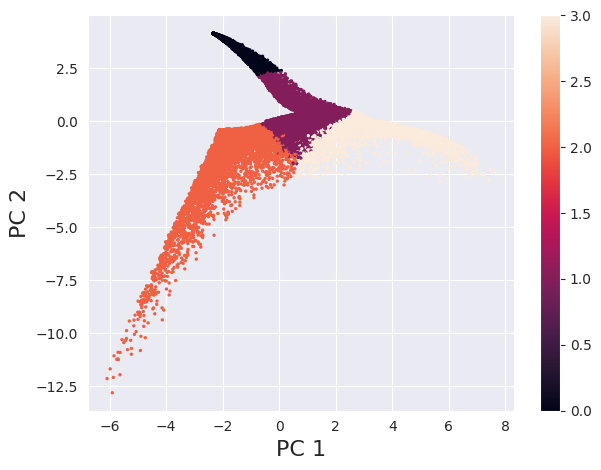

In [28]:
fig, ax = plt.subplots()
im = ax.scatter(PC_train[:,0], PC_train[:,1], c = kmeans_clusters_train, s=2)
fig.colorbar(im, ax=ax)
ax.set_xlabel("PC 1", fontsize=16)
ax.set_ylabel("PC 2", fontsize=16)
fig.tight_layout()

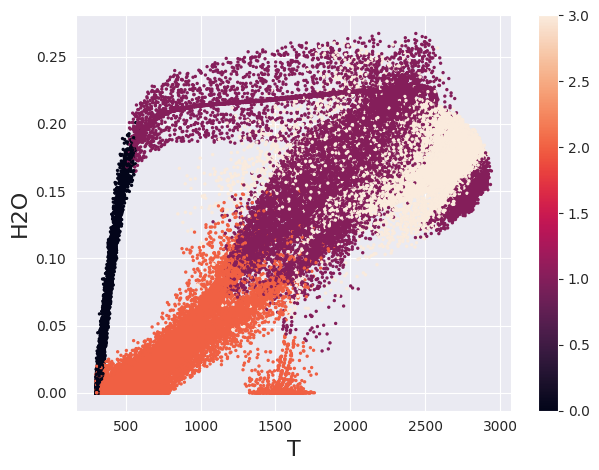

In [29]:
fig, ax = plt.subplots()
im = ax.scatter(dtb.X_train["Temperature_X"], dtb.X_train["H2O_X"], c = kmeans_clusters_train, s=2)
fig.colorbar(im, ax=ax)
ax.set_xlabel("T", fontsize=16)
ax.set_ylabel("H2O", fontsize=16)
fig.tight_layout()

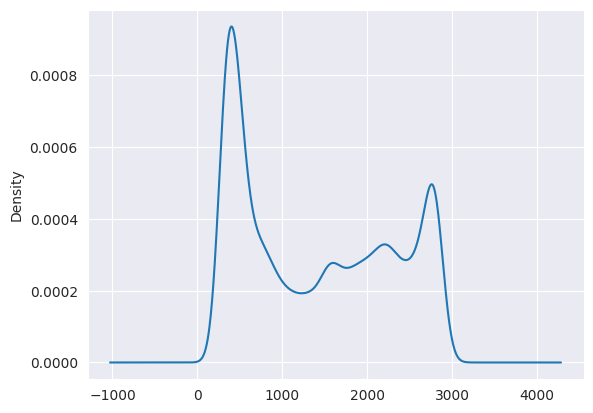

In [43]:
T_X = dtb.X_train['Temperature_X']
ax = T_X.plot.kde()
